In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import glob


c:\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


path = "./datasets/europe_situation_updates" 
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files    
all_df = pd.DataFrame()

for file in files: 
    current_data = pd.read_csv(path+"/"+file) 
    all_df = pd.concat([all_df, current_data])

all_df.to_csv("covid.csv")


In [2]:
df = pd.read_csv('covid.csv')
df

,EU,cases,Deaths,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,\nEU/EEA and the UK\n,\nCases \n,\nDeaths \n
0,Italy,650,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Germany,47,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,38,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Spain,25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
430,Latvia,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,Cyprus,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,Malta,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,Lithuania,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['EU', 'cases', 'Deaths', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', '\nEU/EEA and the UK\n', '\nCases \n',
       '\nDeaths \n'],
      dtype='object')

In [4]:
df1 = df.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7','\nEU/EEA and the UK\n', '\nCases \n', '\nDeaths \n'], axis='columns')

In [5]:
df1

,EU,cases,Deaths
0,Italy,650,17
1,Germany,47,0
2,France,38,2
3,Spain,25,0
4,United Kingdom,16,0
...,...,...,...
430,Latvia,19,0
431,Cyprus,14,0
432,Malta,12,0
433,Lithuania,6,0


In [6]:
df1.describe()

,cases,Deaths
count,435.000000,435.000000
mean,433.673563,17.048276
std,1772.266495,114.411356
min,1.000000,0.000000
25%,5.000000,0.000000
50%,21.000000,0.000000
75%,117.000000,0.000000
max,17660.000000,1268.000000


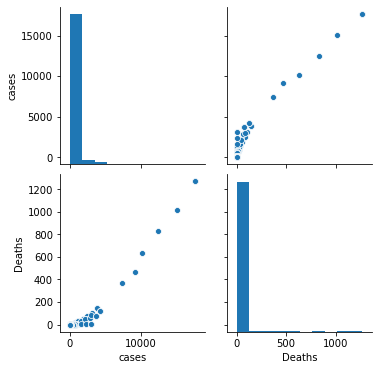

In [7]:
sns.pairplot(df1)

In [8]:
df1.groupby(['EU']).sum()

,cases,Deaths
EU,,
Andorra,2,0
Austria,2219,3
Belgium,2686,12
Bulgaria,104,4
Croatia,206,0
Cyprus,44,0
Czech Republic,596,0
Czech republic,94,0
Denmark,3288,0


In [7]:
df2 = df1.replace({'Czech republic':'Czech Republic', 'United kingdom' : 'United Kingdom'})
df2

,EU,cases,Deaths
0,Italy,650,17
1,Germany,47,0
2,France,38,2
3,Spain,25,0
4,United Kingdom,16,0
...,...,...,...
430,Latvia,19,0
431,Cyprus,14,0
432,Malta,12,0
433,Lithuania,6,0


In [8]:
df2.groupby(['EU']).sum()

,cases,Deaths
EU,,
Andorra,2,0
Austria,2219,3
Belgium,2686,12
Bulgaria,104,4
Croatia,206,0
Cyprus,44,0
Czech Republic,690,0
Denmark,3288,0
Estonia,253,0


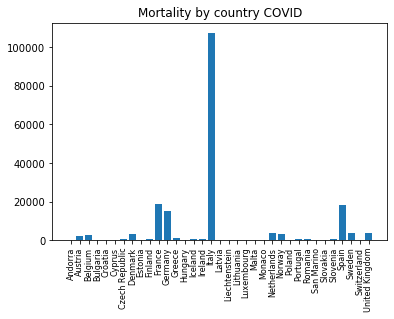

In [9]:
country_group = df2.groupby('EU')
country_cases = country_group.sum()['cases']

keys = [pair for pair, df2 in country_group]
plt.bar(keys, country_cases)
plt.xticks(keys, rotation='vertical', size=8)
plt.title("Mortality by country COVID")
plt.show()

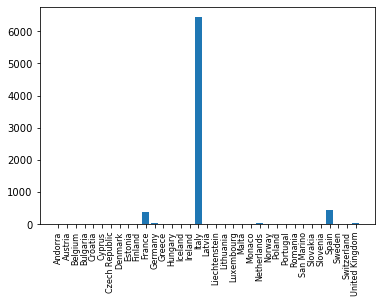

In [10]:
country_group = df2.groupby('EU')
country_cases = country_group.sum()['Deaths']

keys = [pair for pair, df2 in country_group]
plt.bar(keys, country_cases)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

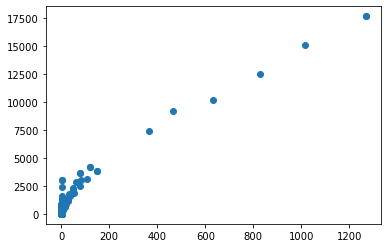

In [11]:
plt.scatter(df2.Deaths, df2.cases)


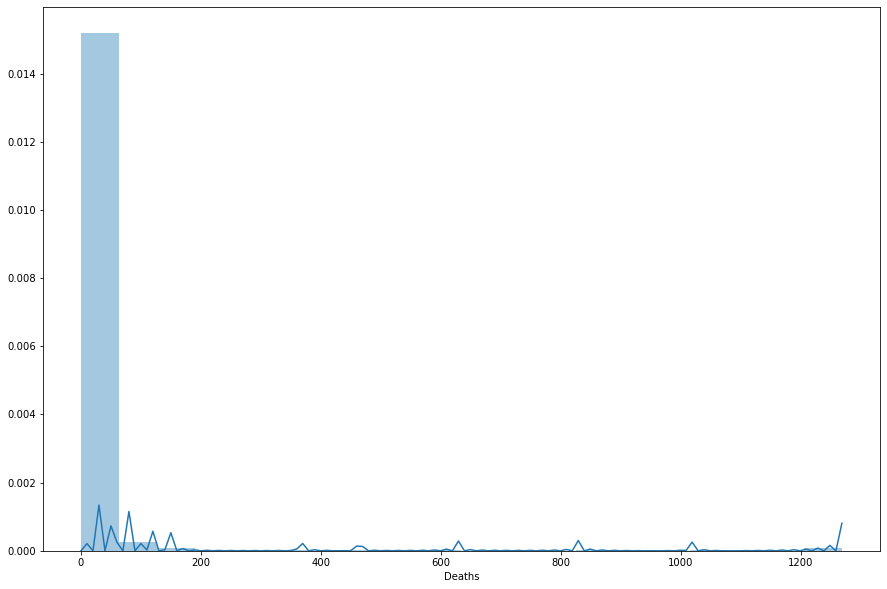

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['Deaths'])

In [13]:
X = df2['cases'].values.reshape(-1,1)
X

array([[  650],
       [   47],
       [   38],
       [   25],
       [   16],
       [    8],
       [    7],
       [    5],
       [    4],
       [    3],
       [    3],
       [    2],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [  888],
       [   57],
       [   57],
       [   34],
       [   18],
       [   12],
       [   12],
       [    7],
       [    6],
       [    5],
       [    4],
       [    3],
       [    3],
       [    2],
       [    2],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [ 1128],
       [  111],
       [  100],
       [   66],
       [   23],
       [   18],
       [   15],
       [   13],
       [   10],
       [    7],
       [    7],
       [    5],
       [    3],
       [    3],
       [    3],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [    1],
       [  130],
       [

In [14]:
y = df2['Deaths'].values.reshape(-1,1)
y

array([[  17],
       [   0],
       [   2],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [  21],
       [   0],
       [   2],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [  29],
       [   0],
       [   2],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   2],
       [   0],
       [   0],
       [   0],
       [   0],
       [  

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=5)

In [17]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
clf.score(X_test,y_test)

0.9327255129782618

In [19]:
y_pred = clf.predict(X_test)

In [20]:
df3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df3

,Actual,Predicted
0,0,-9.518217
1,1,-1.903849
2,1,-4.525189
3,2,-6.647226
4,121,253.864048
...,...,...
82,17,30.363600
83,0,-10.142346
84,0,-6.147923
85,1,-8.769263


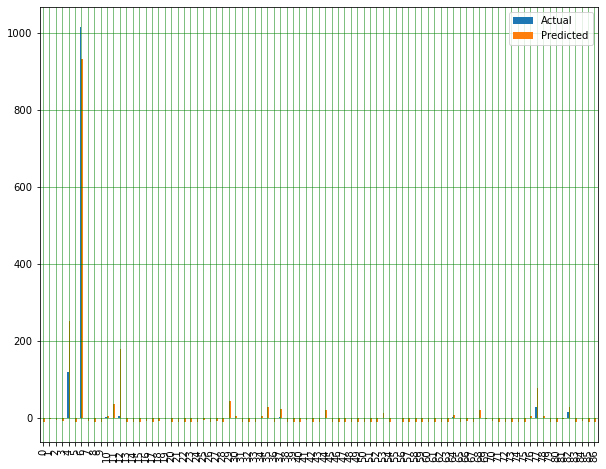

In [25]:
%matplotlib inline
df3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

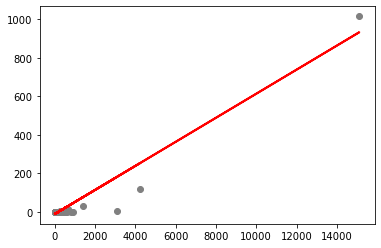

In [21]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [22]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.548259635194599
Mean Squared Error: 797.4352032632813
Root Mean Squared Error: 28.238895220303526


In [23]:
df3.cov()

,Actual,Predicted
Actual,11991.287356,11242.234445
Predicted,11242.234445,11299.012139


In [31]:
len(df2)

435

In [37]:
kde_res = kde.KDEUnivariate(res.predict())

Text(0.5, 1.0, 'Distribution of our Predictions')

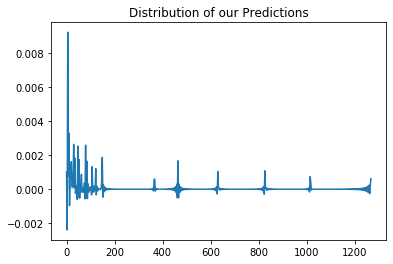

In [38]:
kde_res.fit()

plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribution of our Predictions")

In [119]:
from scipy.stats import binom, poisson

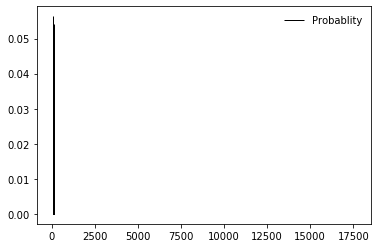

In [120]:
fig, ax = plt.subplots(1,1)
x = df2.cases
n, p = 200, 0.5
rv = binom(n,p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='Probablity')
ax.legend(loc='best', frameon=False)

In [121]:
from scipy import stats

In [122]:
re = poisson(df2.cases.mean())
re.pmf(23)

7.947269303654291e-151

In [123]:
stats.zscore(df2.cases)

array([ 1.22202568e-01, -2.18431474e-01, -2.23515564e-01, -2.30859250e-01,
       -2.35943341e-01, -2.40462532e-01, -2.41027431e-01, -2.42157229e-01,
       -2.42722127e-01, -2.43287026e-01, -2.43287026e-01, -2.43851925e-01,
       -2.44416824e-01, -2.44416824e-01, -2.44416824e-01, -2.44416824e-01,
       -2.44416824e-01, -2.44416824e-01, -2.44416824e-01,  2.56648509e-01,
       -2.12782485e-01, -2.12782485e-01, -2.25775160e-01, -2.34813543e-01,
       -2.38202936e-01, -2.38202936e-01, -2.41027431e-01, -2.41592330e-01,
       -2.42157229e-01, -2.42722127e-01, -2.43287026e-01, -2.43287026e-01,
       -2.43851925e-01, -2.43851925e-01, -2.44416824e-01, -2.44416824e-01,
       -2.44416824e-01, -2.44416824e-01, -2.44416824e-01, -2.44416824e-01,
        3.92224247e-01, -1.82277944e-01, -1.88491832e-01, -2.07698395e-01,
       -2.31989048e-01, -2.34813543e-01, -2.36508239e-01, -2.37638037e-01,
       -2.39332734e-01, -2.41027431e-01, -2.41027431e-01, -2.42157229e-01,
       -2.43287026e-01, -

In [24]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits


In [25]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'radom_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'Gaussian_nb' : {
        'model' : GaussianNB(),
        'params' : {}
    },
    'multinominal_nb' : {
        'model' : MultinomialNB(),
        'params' : {}
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini','entropy'],
        }
    },
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {}
    }
}

In [26]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\skl

c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

c:\python37\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\

In [27]:
scores

[{'model': 'svm',
  'best_score': 0.8045962732919255,
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model': 'radom_forest',
  'best_score': 0.7759006211180124,
  'best_params': {'n_estimators': 5}},
 {'model': 'logistic_regression',
  'best_score': 0.7815734989648033,
  'best_params': {'C': 1}},
 {'model': 'Gaussian_nb', 'best_score': 0.7988405797101449, 'best_params': {}},
 {'model': 'multinominal_nb',
  'best_score': 0.7787577639751553,
  'best_params': {}},
 {'model': 'decision_tree',
  'best_score': 0.7730434782608695,
  'best_params': {'criterion': 'gini'}},
 {'model': 'linear_regression',
  'best_score': -2.9806197310160796,
  'best_params': {}}]

In [28]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.804596,"{'C': 1, 'kernel': 'rbf'}"
1,radom_forest,0.775901,{'n_estimators': 5}
2,logistic_regression,0.781573,{'C': 1}
3,Gaussian_nb,0.798841,{}
4,multinominal_nb,0.778758,{}
5,decision_tree,0.773043,{'criterion': 'gini'}
6,linear_regression,-2.980620,{}
